This notebook contains things that were not used but that might be useful in the end... 

# For collab only

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 8.7 MB/s 


In [ ]:
!pip install -q pyyaml h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/Othercomputers/My Laptop/Documents/UCA DSAI/Internship 2/Code/text-models/scripts_and_notebooks/

/content/drive/Othercomputers/My Laptop/Documents/UCA DSAI/Internship 2/Code/text-models/scripts_and_notebooks


# Train test splitting

In [ ]:
# Train test splitting (original version)

# Parameters 
# Dataset
data = {'Movie':['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A','B','B','B','B','B','B','B','B','C','C','C','C','C'],'Movie2':['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A','B','B','B','B','B','B','B','B','C','C','C','C','C'],'Character': ['1', '1', '1', '1', '2', '2', '2', '3','4','4','4','1','1','2','2','3','1','1','2','3','4'],'Character2': ['1', '1', '1', '1', '2', '2', '2', '3','4','4','4','5','5','6','6','7','8','8','9','10','11'],'Dialogues': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i','j','k','l','m','n','o','p','q','r','s','t','u']}
data = pd.DataFrame(data)
# Variables where elements of each group should be represnted un train and test. 
# For example, we might want dialogues of each movie to be in both sets.
each_in_both = ['Movie', 'Movie2']
# Variables where elements of each group should be either in test or in train but not in both. 
# For example, we might want that if a movie is in the train set we don't want it in the test set.
# Be carefull! More than one variable can be used, but if you selected, for instance, movie and actor, and let's assume movie1-actor1 dialogues were placed in the train set, movie1-actor2 could be in the test set. 
# This occurs because the groups are done at movie-actor level. 
not_in_both = ['Character']
# Percent in the training 
train_percent = 0.8
validation_percent = 0.1
# Seed
random_seed = None

# Func

# ----------------Case 1

# Weights by group
data_groups = data.groupby(each_in_both + not_in_both).size() / data.groupby(each_in_both).size()
data_groups = data_groups.to_frame(name = 'weights').reset_index()

print(data_groups)

# Get the groups in train and test
# Sample some percent of the groups
train_groups = data_groups.groupby(each_in_both).sample(frac=train_percent, replace=False, weights=data_groups['weights'], random_state=random_seed).drop(columns = 'weights')
# Groups that were npot selected in the train, go in the test
test_groups = pd.merge(data_groups,train_groups,how='outer',indicator=True).query('_merge=="left_only"').drop(columns = ['_merge','weights'])

# Get train and test
train = pd.merge(data, train_groups)
test = pd.merge(data, test_groups)

print(train)
print(test)

len(train)/len(data)


# -------------------------Case 2

# Variables where elements of each group should be represnted un train and test. 
# For example, we might want dialogues of each movie to be in both sets.
each_in_both = None
# Variables where elements of each group should be either in test or in train but not in both
# For example, we might want that if a movie is in the train set we don't want it in the test set.
not_in_both = ['Movie']
# Percent in the training 
train_percent = 0.8
# Seed
random_seed = None

# Func

# Weights by group
data_groups = data.groupby(not_in_both).size() / len(data) #
data_groups = data_groups.to_frame(name = 'weights').reset_index()

# Get the groups in train and test
# Sample some percent of the groups
train_groups = data_groups.sample(frac=train_percent, replace=False, weights=data_groups['weights'], random_state=random_seed).drop(columns = 'weights') #
# Groups that were npot selected in the train, go in the test
test_groups = pd.merge(data_groups,train_groups,how='outer',indicator=True).query('_merge=="left_only"').drop(columns = ['_merge','weights'])

# Get train and test
train = pd.merge(data, train_groups)
test = pd.merge(data, test_groups)

print(train)
print(test)

len(train)/len(data)

# -------------------------Case 3

# Variables where elements of each group should be represnted un train and test. 
# For example, we might want dialogues of each movie to be in both sets.
each_in_both = ['Movie', 'Movie2']
# Variables where elements of each group should be either in test or in train but not in both
# For example, we might want that if a movie is in the train set we don't want it in the test set.
not_in_both = None
# Percent in the training 
train_percent = 0.8
# Seed
random_seed = None

# Get train and test
train = data.groupby(each_in_both).sample(frac=train_percent, replace=False, random_state=random_seed)
test = pd.merge(data,train,how='outer',indicator=True).query('_merge=="left_only"').drop(columns = ['_merge'])

print(train_groups)
print(test_groups)


# -------------------------Case 4

# Variables where elements of each group should be represnted un train and test. 
# For example, we might want dialogues of each movie to be in both sets.
each_in_both = None
# Variables where elements of each group should be either in test or in train but not in both. 
# For example, we might want that if a movie is in the train set we don't want it in the test set.
# Be carefull! More than one variable can be used, but if you selected, for instance, movie and actor, and let's assume movie1-actor1 dialogues were placed in the train set, movie1-actor2 could be in the test set. 
# This occurs because the groups are done at movie-actor level. 
not_in_both = None
# Percent in the training 
train_percent = 0.8
# Seed
random_seed = None

# Get train and test
train = data.sample(frac=train_percent, replace=False, random_state=random_seed)
test = pd.merge(data,train,how='outer',indicator=True).query('_merge=="left_only"').drop(columns = ['_merge'])



# Exact results from model

In [ ]:
import re
import pandas as pd
import numpy as np
import myfunctions
import pickle
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('../src/protoryNet/')
from protoryNet import ProtoryNet

[nltk_data] Downloading package punkt to
[nltk_data]     /nfshome/students/cm007951/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
%cd ..

/nfshome/students/cm007951/text-models


In [ ]:
def score_trajectory(protorynet_model, list_of_sentences):
    '''
    Given a list of sentences (usually a list of prototypes), it returns the prediction for each of them. 
    Inputs:
    protorynet_model: a protorynet model
    list_of_sentences: a list of sentences
    '''
    pred = []
    for prot in list_of_sentences:
        pred.append(protorynet_model.predict([prot])[0])
    return pred

In [ ]:
# Loading the train, val and testing splits

# To see how this datasets were created see the ```protorynet_prototype_initializations.ipynb``` notebook. 

directory =  'datasets/cornell_corpus/cornell_prepro_characters_70train_20val_10test/'

x_train = pickle.load(open(directory) + 'x_train', 'wb')
x_val = pickle.load(open(directory) + 'x_val', 'wb')
x_test = pickle.load(open(directory) + 'x_test', 'wb')
y_train = pickle.load(open(directory) + 'y_train', 'wb')
y_val = pickle.load(open(directory) + 'y_val', 'wb')
y_test = pickle.load(open(directory) + 'y_test', 'wb')


In [ ]:
# # Load dataset
# cornell_prepro_characters = pd.read_csv('datasets/cornell_corpus/cornell_prepro_characters.csv')

# # Split data
# X = cornell_prepro_characters['text_with_punctuation']
# y = np.array(cornell_prepro_characters['gender'] == 'F').astype(int)

# x_train, x_val, x_test, y_train, y_val, y_test = myfunctions.balanced_split_train_val_test(X, y, train_split = 0.7, val_split = 0.2, test_split = 0.1, random_seed = 32)

In [ ]:


# # Saving to pickle format
# directory =  'datasets/cornell_corpus/cornell_prepro_characters_70train_20val_10test/'

# with open(directory +'x_train', 'wb') as f:
#      pickle.dump(x_train, f)
# with open(directory +'x_val', 'wb') as f:
#      pickle.dump(x_val, f)
# with open(directory +'x_test', 'wb') as f:
#      pickle.dump(x_test, f)

# with open(directory +'y_train', 'wb') as f:
#      pickle.dump(y_train, f)
# with open(directory +'y_val', 'wb') as f:
#      pickle.dump(y_val, f)
# with open(directory +'y_test', 'wb') as f:
#      pickle.dump(y_test, f)

In [ ]:
# !python code/train_protorynet.py --dataset_path=datasets/cornell_corpus/cornell_prepro_characters_70train_20val_10test/ --results_path=results/protorynet_models/ --results_prefix=cornell_prepro_characters_70train_20val_10test --epochs=2 --number_prototypes=10 --type_init=random --sample_size_sentences=20000 --init_prototypes_seed=16

[nltk_data] Downloading package punkt to
[nltk_data]     /nfshome/students/cm007951/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
new
2022-07-26 12:29:12.127418: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 12:29:12.135578: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 12:29:12.136387: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 12:29:12.137349: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following C

In [ ]:
# Preprocessing to use protorynet model's results
# In this section there is no need to use the validation set, since we want to evaluate the predictions and accuracy in the test set.
# The train set is necessary because we need to map the prototypes (which belong to the train set only)

# Guarantee target variable is integer
y_train = [int(y) for y in y_train]
y_test = [int(y) for y in y_test]

# Split text into lists of sentences 
x_train = myfunctions.split_sentences(x_train)
x_test = myfunctions.split_sentences(x_test)

# Make a list of sentences (only for training set)
train_sentences = []
for p in x_train:
    train_sentences.extend(p)

# We remove very short or very long sentences since they behave as outliers.
train_sentences = [i for i in train_sentences if len(i)>5 and len(i)<100]

In [ ]:
results_path = 'results/protorynet_models/'
model_name = 'cornell_prepro_characters_70train_20val_10test__2epochs__10prototypes' 
model_path = results_path + model_name + '.h5'

# Extract number of prototypes from models name
number_prototypes = int(re.search('[0-9]*prototypes', model_name).group(0).replace('prototypes',''))

# # Import Google Sentence encoder, to convert sentences into vector values
# module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
# model_sentence_encoder = hub.load(module_url)
# def embed(input):
#     return model_sentence_encoder(input)

# #Compute embeddings of sentences
# train_sentences_embedded = embed(train_sentences)

# Load model
pNet_saved = ProtoryNet()
model = pNet_saved.createModel(np.zeros((number_prototypes, 512)), number_prototypes)
model.load_weights(model_path)

# Sentence embedding using the finetune embedder in the model
train_sentences_embedded = pNet_saved.embed(train_sentences)

# Evaluate the model on testing data
preds_test, accuracy_test = pNet_saved.evaluate(x_test, y_test)

[db] model.input =  KerasTensor(type_spec=TensorSpec(shape=(None,), dtype=tf.string, name='input_1'), name='input_1', description="created by layer 'input_1'")
[db] protoLayerName =  proto_layer
[db] protoLayer =  <protoryNet.ProtoryNet.createModel.<locals>.prototypeLayer object at 0x7f2cc025f8d0>
[db] protoLayer.output =  (<KerasTensor: shape=(1, None, 10) dtype=float32 (created by layer 'proto_layer')>, <KerasTensor: shape=(10, 512) dtype=float32 (created by layer 'proto_layer')>)
[db] distanceLayer.output =  KerasTensor(type_spec=TensorSpec(shape=(1, None, 10), dtype=tf.float32, name=None), name='distance_layer/PartitionedCall:0', description="created by layer 'distance_layer'")
Model: "custom_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 keras_layer (KerasLaye

In [ ]:
%%time
# Extract final prototypes of the model
final_prototypes = pNet_saved.showPrototypes(train_sentences, train_sentences_embedded, number_prototypes, printOutput=False, return_prototypes = True)

CPU times: user 26.9 s, sys: 125 ms, total: 27 s
Wall time: 27 s


In [ ]:
# Predict example
example = x_test[1]
print(example)
pNet_saved.predict(example)

['Where you been?', 'Yeah.', 'Yeah.', "Ok. Ok. Wow, you're goin' to Hawaii, that's great you're goin ?", 'Where you goin?', 'What happened?', "What's up?", "You talkin' to me about Ramada Inn?", 'Which guy in Toledo are you talking about?', 'WHICH?', 'So what should I do with the pudding?', 'You should go on a trip.', "You're goin' on a trip?", "What's with all this pudding, what is this?", 'Good morning, Barry Why is it here?', 'Barry Barry?', "That's not a piano I have a piano at home where'd you get it?", 'What is this?', 'Yeah you got here early huh?', "Why you wearin' a suit?", 'You ok?', 'Hey, good morning, Barry.']


array([0.541902], dtype=float32)

In [ ]:
pickle.load(open('results/protorynet_models/' + model_name + '.pickle', 'rb'))

{'train_time': 39.47689822514852,
 'history_validation_accuracy': [0.501039501039501, 0.5426195426195426],
 'best_validation_accuracy': 0.5426195426195426,
 'initial_prototypes': {0: 'I called your house like four times.',
  1: "I don't think people even noticed.",
  2: "I'm the victim.",
  3: "But I can't just drop everything and leave.",
  4: 'Oh, some of the scripts were so spirited!',
  5: "How'd you do on the science test?",
  6: "I'm going to look around.",
  7: 'No de-fense.',
  8: 'Baxter?',
  9: 'Poor girl how could you do a thing like that?'}}

# Leave-some-movies-out

In [ ]:
%cd ..

/content/drive/Othercomputers/My Laptop/Documents/UCA DSAI/Internship 2/Code/text-models


In [ ]:
# # Load dataset
# cornell_prepro_characters = pd.read_csv('datasets/cornell_corpus/cornell_prepro_characters.csv')

# # Take only the variables we need for training and leave-one-group-out
# cornell_prepro_characters_LOO = cornell_prepro_characters[['text_with_punctuation', 'gender', 'movieGroup']]

# # Target variable to 0 1
# cornell_prepro_characters_LOO['target'] = np.array(cornell_prepro_characters_LOO['gender'] == 'F').astype(int)

# # Save pandas dataset
# cornell_prepro_characters_LOO.to_csv('datasets/cornell_corpus/cornell_prepro_characters_LOO.csv', index=False)
# cornell_prepro_characters_LOO

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text_with_punctuation,gender,movieGroup,target
0,They do not! I hope so. Let's go. Okay you're ...,F,1,1
1,She died in her sleep three days ago. It was i...,F,1,1
2,Six-fifty. Knock yourself out. That's all that...,M,5,0
3,Wow Uh don't see it. There's no signature. But...,F,1,1
4,"Of course, but there's more Uh, V.I.P. securit...",M,1,0
...,...,...,...,...
2399,Maybe we should wait for Mr. Christy. The kill...,F,3,1
2400,It's over twenty miles to the crossroads. Stev...,M,3,0
2401,Gotta pee. You're lying on my bladder. Like wa...,F,3,1
2402,I've got to go to town and pick up the trailer...,M,3,0


In [ ]:
!python scripts_and_notebooks/leave-one-group-out_protorynet.py --dataset_path=datasets/cornell_corpus/cornell_prepro_characters_LOO.csv --results_path=results/protorynet_models/ --results_prefix=cornell_prepro_characters --group_variable=movieGroup --text_variable=text_with_punctuation --target_variable=target --epochs=1 --number_prototypes=10 --type_init=random --sample_size_sentences=5000 --init_prototypes_seed=16

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pickle
LOGO_results= pickle.load(open('results/protorynet_models/leave-one-group-out__cornell_prepro_characters__movieGroupgroupvariable__1epochs__10prototypes__randomtype_init__5000sample_size_sentences__16init_prototypes_seed.pickle', 'rb'))

In [ ]:
LOGO_results.keys()

dict_keys(['train_time', 'history_validation_accuracy', 'best_validation_accuracy', 'initial_prototypes', 'predictions_on_test', 'text_test', 'ground_truth', 'test_accuracy', 'final_prototypes', 'args'])

In [ ]:
LOGO_results['test_accuracy']

[0.5041322314049587,
 0.5678294573643411,
 0.4857142857142857,
 0.5,
 0.5151515151515151]

# Save test dataset

In [ ]:
%cd ..

In [ ]:
# This is temporal (delete this cell later)
import pandas as pd
import pickle

x_test = pickle.load(open('datasets/cornell_corpus/cornell_prepro_characters_70train_20val_10test/x_test', 'rb'))
y_test = pickle.load(open('datasets/cornell_corpus/cornell_prepro_characters_70train_20val_10test/y_test', 'rb'))
pd.DataFrame({'text_with_punctuation': x_test,'target': y_test}).to_csv('test_set_to_observe.csv')

# Results deep models

In [1]:
%cd .. 

c:\Users\Dell\Documents\UCA DSAI\Internship 2\Code\text-models


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import myfunctions
import pandas as pd
import time
import pickle
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm

c:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Path for saving results
path_to_models = 'results/models/'

In [4]:
# Path for saving images
# Make sure to change this to your own path!!!
path_of_saving_images = '//wsl$/Ubuntu-20.04/home/mchaves/internship2/final_report/Internship report/img/'

In [5]:
# Define the combinations of different architectures, sizes for layer, among others.
embedding_latent_space = [128, 64]
dense_layers_activation = ['relu', 'gelu']
last_layer_activation = ['sigmoid','softmax']

combinations = [{'architecture':['E+G+D+D'], 
                  'embedding_latent_space': embedding_latent_space,
                  'dense_layers_sizes':[[64, 32], [32, 16]],
                  'dense_layers_activation': dense_layers_activation,
                  'last_layer_activation':last_layer_activation},
                 {'architecture':['E+LSTM+D','E+BiLSTM+D'],
                  'embedding_latent_space': embedding_latent_space,
                  'dense_layers_sizes':[[64], [32]],
                  'dense_layers_activation': dense_layers_activation,
                  'last_layer_activation':last_layer_activation},
                 {'architecture':['E+LSTM+D+D','E+BiLSTM+D+D'],
                  'embedding_latent_space': embedding_latent_space,
                  'dense_layers_sizes':[[64, 32], [32, 16]],
                  'dense_layers_activation': dense_layers_activation,
                  'last_layer_activation':last_layer_activation},
                 {'architecture':['E+LSTM+G'],
                  'embedding_latent_space': embedding_latent_space,
                  'last_layer_activation':last_layer_activation}
                 ]
model_grid = ParameterGrid(combinations)

In [6]:
# Make a dictionary of dictionaries. 
# Each dictionary contains information about a model to train (the type of architecture, embedding latent space size, dense layers size, among others)
model_combinations = {}
for m in model_grid:
    model_name = ''
    model_nice_name = ''
    first_dense = True
    for letter in m['architecture'].split('+'):
        model_name += letter
        if letter == 'E':
            model_name += str(m['embedding_latent_space']) + '_'
            model_nice_name += 'Emb(' + str(m['embedding_latent_space']) + ') + '
        if letter == 'G':
            model_name += '_'
            model_nice_name += 'GlobMaxPooling + '
        if letter == 'LSTM' or letter == 'BiLSTM':
            model_name += str(64) + '_'
            model_nice_name += letter + '(64) + '
        if letter == 'D' and not first_dense:
            model_name += str(m['dense_layers_sizes'][1]) + m['dense_layers_activation'] + '_'
            model_nice_name += 'Dense(' + str(m['dense_layers_sizes'][1]) + ',' + m['dense_layers_activation'] + ') + '
        if letter == 'D'and first_dense:
            first_dense = False
            try: 
                model_name += str(m['dense_layers_sizes'][0]) + m['dense_layers_activation'] + '_'
                model_nice_name += 'Dense(' + str(m['dense_layers_sizes'][0]) + ',' + m['dense_layers_activation'] + ') + '
            except: 
                model_name += str(m['dense_layers_sizes']) + m['dense_layers_activation'] + '_'  
                model_nice_name += 'Dense(' + str(m['dense_layers_sizes']) + ',' + m['dense_layers_activation'] + ') + '
                print(model_name)
    model_name += m['last_layer_activation']
    model_nice_name += m['last_layer_activation']
    m['model_nice_name'] = model_nice_name
    m['model_name'] = model_name
    model_combinations[model_name] = m

print(model_combinations.keys())

dict_keys(['E128_G_D64relu_D32relu_sigmoid', 'E128_G_D64relu_D32relu_softmax', 'E64_G_D64relu_D32relu_sigmoid', 'E64_G_D64relu_D32relu_softmax', 'E128_G_D32relu_D16relu_sigmoid', 'E128_G_D32relu_D16relu_softmax', 'E64_G_D32relu_D16relu_sigmoid', 'E64_G_D32relu_D16relu_softmax', 'E128_G_D64gelu_D32gelu_sigmoid', 'E128_G_D64gelu_D32gelu_softmax', 'E64_G_D64gelu_D32gelu_sigmoid', 'E64_G_D64gelu_D32gelu_softmax', 'E128_G_D32gelu_D16gelu_sigmoid', 'E128_G_D32gelu_D16gelu_softmax', 'E64_G_D32gelu_D16gelu_sigmoid', 'E64_G_D32gelu_D16gelu_softmax', 'E128_LSTM64_D64relu_sigmoid', 'E128_LSTM64_D64relu_softmax', 'E64_LSTM64_D64relu_sigmoid', 'E64_LSTM64_D64relu_softmax', 'E128_LSTM64_D32relu_sigmoid', 'E128_LSTM64_D32relu_softmax', 'E64_LSTM64_D32relu_sigmoid', 'E64_LSTM64_D32relu_softmax', 'E128_LSTM64_D64gelu_sigmoid', 'E128_LSTM64_D64gelu_softmax', 'E64_LSTM64_D64gelu_sigmoid', 'E64_LSTM64_D64gelu_softmax', 'E128_LSTM64_D32gelu_sigmoid', 'E128_LSTM64_D32gelu_softmax', 'E64_LSTM64_D32gelu_sigmo

In [7]:
# Get results from models

table_of_results = {'Model': [], 'Train accuracy':[], 'Test accuracy':[], 'Men accuracy (on test)':[], 'Women accuracy (on test)':[], 'Training time (minutes)': []}
df_for_metrics_chart = {'Model': [], 'Epochs': [], 'Set': [], 'Metric': [], 'Values': [], 'Architecture':[], 'model_name':[]}
summarized_table = {'model_name':[], 'test_accuracy':[]} 

for model_info in model_combinations.values(): 

    # Load results
    results = pickle.load(open(path_to_models + model_info['model_name'] + ".pickle", "rb" ))
    
    # Results for table   
    table_of_results['Model'].append(model_info['model_nice_name'])
    table_of_results['Train accuracy'].append(results['train_accuracy'] * 100)
    table_of_results['Test accuracy'].append(results['test_accuracy'] * 100)
    table_of_results['Men accuracy (on test)'].append(results['test_accuracy_0'] * 100)
    table_of_results['Women accuracy (on test)'].append(results['test_accuracy_1'] * 100)
    table_of_results['Training time (minutes)'].append(results['execution_time'])

    # Results for small table
    summarized_table['model_name'].append(model_info['model_name'])
    summarized_table['test_accuracy'].append(results['test_accuracy'])

    # Results for plot 
    metrics_history = results['history_metrics']   
    epochs = len(metrics_history['loss']) 
    df_for_metrics_chart['Model'].extend([model_info['model_nice_name']] * 4 * epochs)
    df_for_metrics_chart['model_name'].extend([model_info['model_name']] * 4 * epochs)
    df_for_metrics_chart['Architecture'].extend([model_info['architecture']] * 4 * epochs)
    df_for_metrics_chart['Epochs'].extend(list(range(1,epochs+1)) * 4)
    df_for_metrics_chart['Set'].extend(list(['Train'] *  epochs + ['Validation'] * epochs) * 2)
    df_for_metrics_chart['Metric'].extend(['Loss'] * 2 * epochs + ['Accuracy'] * 2 * epochs)
    df_for_metrics_chart['Values'].extend(metrics_history['loss'] + metrics_history['val_loss'] + list(np.array(metrics_history['accuracy']) * 100) + list(np.array(metrics_history['val_accuracy']) * 100))
  
# To pandas dataframes
table_of_results = pd.DataFrame(table_of_results).round(2)
# table_of_results.to_csv(path_to_models + 'deepmodels_results.csv')
df_for_metrics_chart = pd.DataFrame(df_for_metrics_chart)
summarized_table = pd.DataFrame(summarized_table)

# Latex table
print(table_of_results.to_latex(index=False))

# Show results
table_of_results


\begin{tabular}{lrrrrr}
\toprule
                                             Model &  Train accuracy &  Test accuracy &  Men accuracy (on test) &  Women accuracy (on test) &  Training time (minutes) \\
\midrule
Emb(128) + GlobMaxPooling + Dense(64,relu) + De... &           98.57 &          68.46 &                   68.33 &                     69.42 &                     0.54 \\
Emb(128) + GlobMaxPooling + Dense(64,relu) + De... &           98.39 &          63.07 &                   67.50 &                     58.68 &                     0.52 \\
Emb(64) + GlobMaxPooling + Dense(64,relu) + Den... &           96.37 &          66.80 &                   70.00 &                     63.64 &                     0.70 \\
Emb(64) + GlobMaxPooling + Dense(64,relu) + Den... &           97.68 &          63.90 &                   59.17 &                     68.60 &                     0.69 \\
Emb(128) + GlobMaxPooling + Dense(32,relu) + De... &           98.69 &          67.63 &                   65

,Model,Train accuracy,Test accuracy,Men accuracy (on test),Women accuracy (on test),Training time (minutes)
0,"Emb(128) + GlobMaxPooling + Dense(64,relu) + D...",98.57,68.46,68.33,69.42,0.54
1,"Emb(128) + GlobMaxPooling + Dense(64,relu) + D...",98.39,63.07,67.50,58.68,0.52
2,"Emb(64) + GlobMaxPooling + Dense(64,relu) + De...",96.37,66.80,70.00,63.64,0.70
3,"Emb(64) + GlobMaxPooling + Dense(64,relu) + De...",97.68,63.90,59.17,68.60,0.69
4,"Emb(128) + GlobMaxPooling + Dense(32,relu) + D...",98.69,67.63,65.00,70.25,0.70
...,...,...,...,...,...,...
79,"Emb(64) + BiLSTM(64) + Dense(32,gelu) + Dense(...",70.54,70.54,70.83,70.25,4.47
80,Emb(128) + LSTM(64) + GlobMaxPooling + sigmoid,56.85,56.85,40.00,73.55,2.52
81,Emb(128) + LSTM(64) + GlobMaxPooling + softmax,65.98,65.98,68.33,63.64,2.52
82,Emb(64) + LSTM(64) + GlobMaxPooling + sigmoid,66.39,66.39,71.67,61.16,2.51


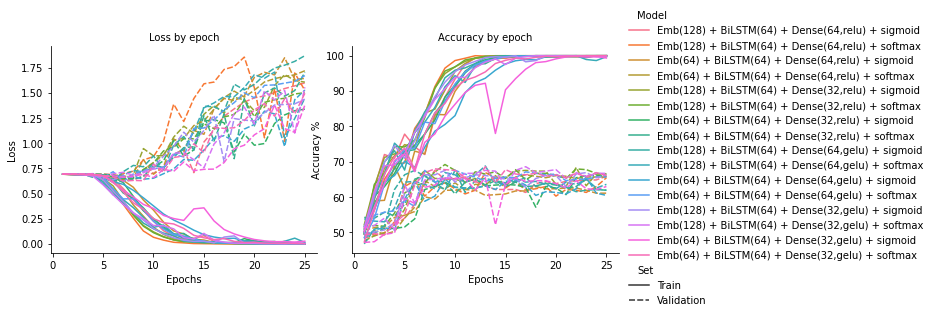

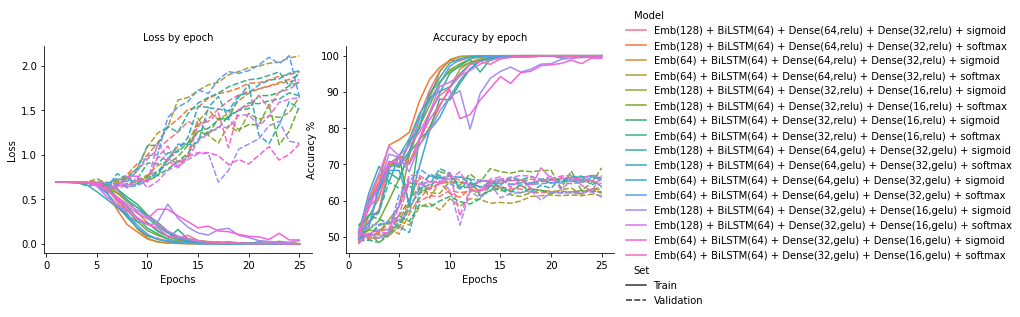

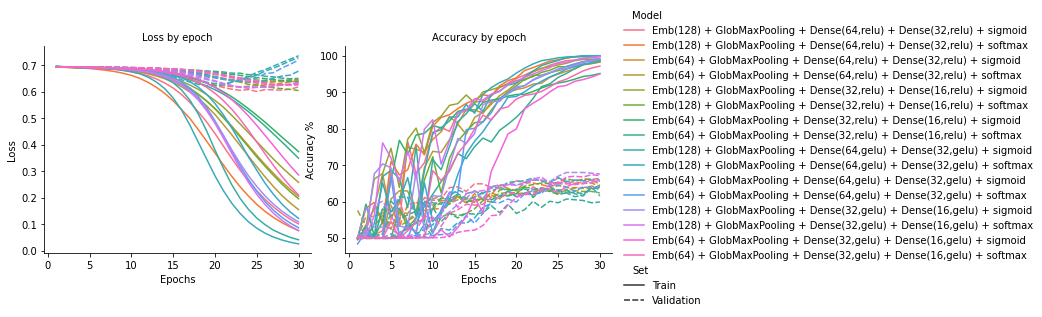

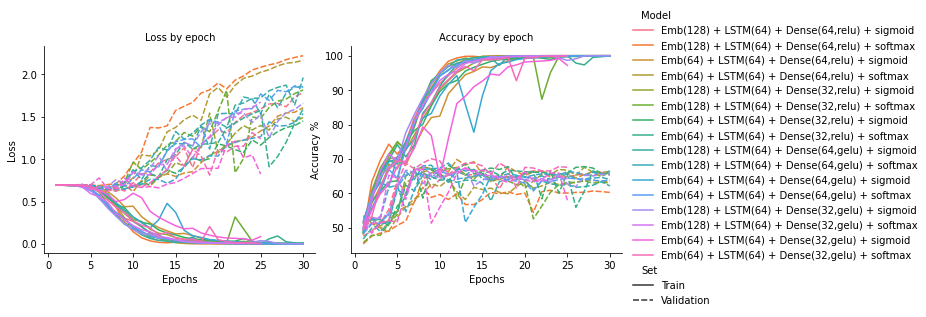

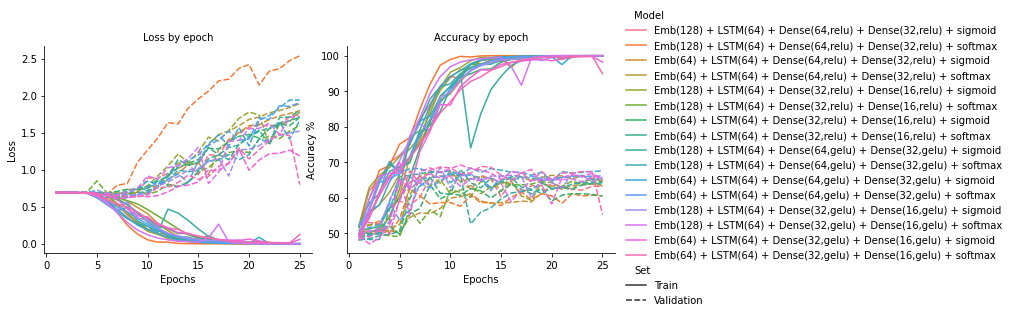

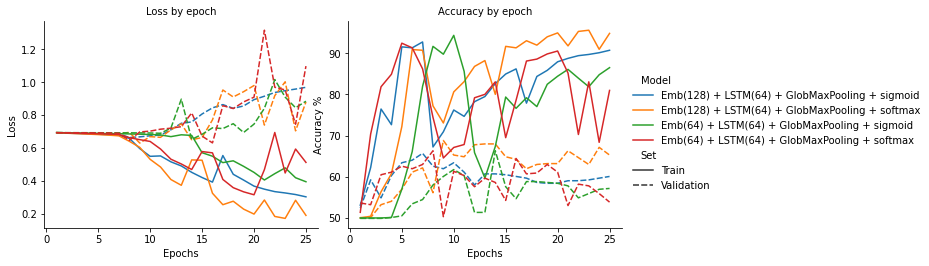

In [8]:
# Plot loss and accuracy curves by type of architecture
for architecture in np.unique(df_for_metrics_chart['Architecture']):

    fig = sns.relplot(
        data = df_for_metrics_chart[df_for_metrics_chart['Architecture'] == architecture], 
        kind = "line",
        x = "Epochs", y = "Values", col = "Metric",
        hue = "Model", style = "Set", 
        height=3.8, aspect = 1.2,
        facet_kws = dict(sharex = True, sharey=False)
    )
    fig.set_titles('{col_name}' + ' by epoch' )
    # fig.set_titles('')
    for ax, title in zip(fig.axes.flat, ['Loss', 'Accuracy %']):
        ax.set_ylabel(title)
    # fig.savefig(path_of_saving_images + 'BERT_individual_model.png')

In [11]:
# Look at the top 10 performing models
table_of_results.sort_values(by=['Test accuracy'], ascending = False)[0:10]

,Model,Train accuracy,Test accuracy,Men accuracy (on test),Women accuracy (on test),Training time (minutes)
57,"Emb(128) + LSTM(64) + Dense(64,gelu) + Dense(3...",71.78,71.78,76.67,66.94,2.35
32,"Emb(128) + BiLSTM(64) + Dense(64,relu) + sigmoid",70.54,70.54,69.17,71.90,4.43
79,"Emb(64) + BiLSTM(64) + Dense(32,gelu) + Dense(...",70.54,70.54,70.83,70.25,4.47
43,"Emb(64) + BiLSTM(64) + Dense(64,gelu) + softmax",69.71,69.71,60.83,78.51,4.38
39,"Emb(64) + BiLSTM(64) + Dense(32,relu) + softmax",69.71,69.71,66.67,72.73,4.38
83,Emb(64) + LSTM(64) + GlobMaxPooling + softmax,69.29,69.29,71.67,66.94,2.52
36,"Emb(128) + BiLSTM(64) + Dense(32,relu) + sigmoid",69.29,69.29,70.83,67.77,4.43
46,"Emb(64) + BiLSTM(64) + Dense(32,gelu) + sigmoid",68.88,68.88,70.00,67.77,4.39
66,"Emb(64) + BiLSTM(64) + Dense(64,relu) + Dense(...",68.46,68.46,70.00,66.94,4.37
63,"Emb(64) + LSTM(64) + Dense(32,gelu) + Dense(16...",68.46,68.46,68.33,68.60,2.37


In [13]:
# Select the best 5
best_models = summarized_table.sort_values(by=['test_accuracy'], ascending = False)[0:5]['model_name']

In [10]:
# Get latex table
print(table_of_results.sort_values(by=['Test accuracy'], ascending = False)[0:5].to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
                                             Model &  Train accuracy &  Test accuracy &  Men accuracy (on test) &  Women accuracy (on test) &  Training time (minutes) \\
\midrule
Emb(128) + LSTM(64) + Dense(64,gelu) + Dense(32... &           71.78 &          71.78 &                   76.67 &                     66.94 &                     2.35 \\
  Emb(128) + BiLSTM(64) + Dense(64,relu) + sigmoid &           70.54 &          70.54 &                   69.17 &                     71.90 &                     4.43 \\
Emb(64) + BiLSTM(64) + Dense(32,gelu) + Dense(1... &           70.54 &          70.54 &                   70.83 &                     70.25 &                     4.47 \\
   Emb(64) + BiLSTM(64) + Dense(64,gelu) + softmax &           69.71 &          69.71 &                   60.83 &                     78.51 &                     4.38 \\
   Emb(64) + BiLSTM(64) + Dense(32,relu) + softmax &           69.71 &          69.71 &                   66

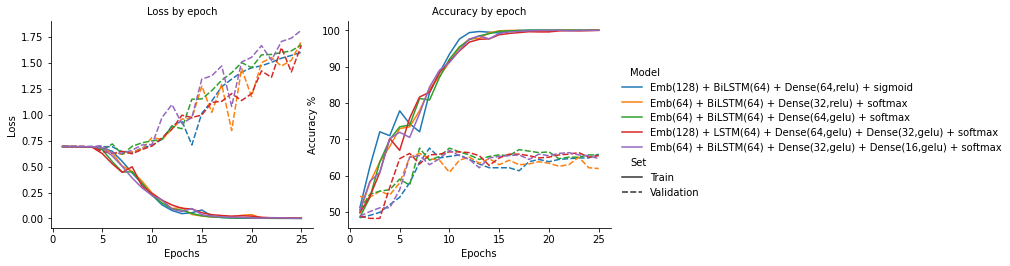

In [14]:
# Plot the best 5
fig = sns.relplot(
    data = df_for_metrics_chart[df_for_metrics_chart['model_name'].isin(best_models)], 
    kind = "line",
    x = "Epochs", y = "Values", col = "Metric",
    hue = "Model", style = "Set", 
    height=3.8, aspect = 1.2,
    facet_kws = dict(sharex = True, sharey=False)
)
fig.set_titles('{col_name}' + ' by epoch' )
for ax, title in zip(fig.axes.flat, ['Loss', 'Accuracy %']):
    ax.set_ylabel(title)
fig.savefig(path_of_saving_images + 'best_deep_model_individual.png')